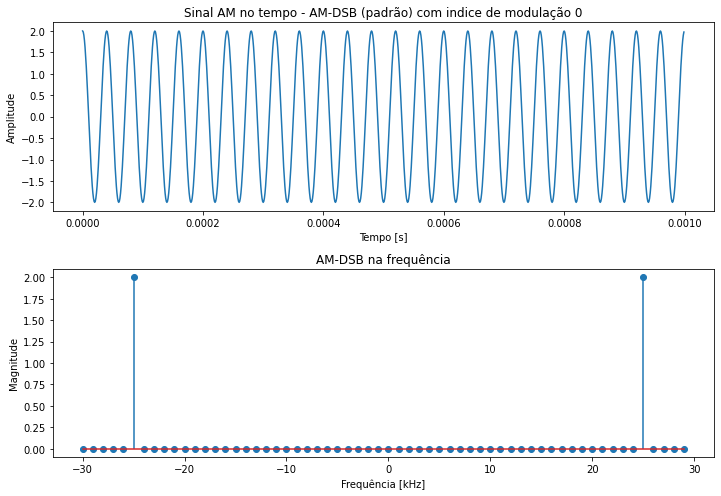

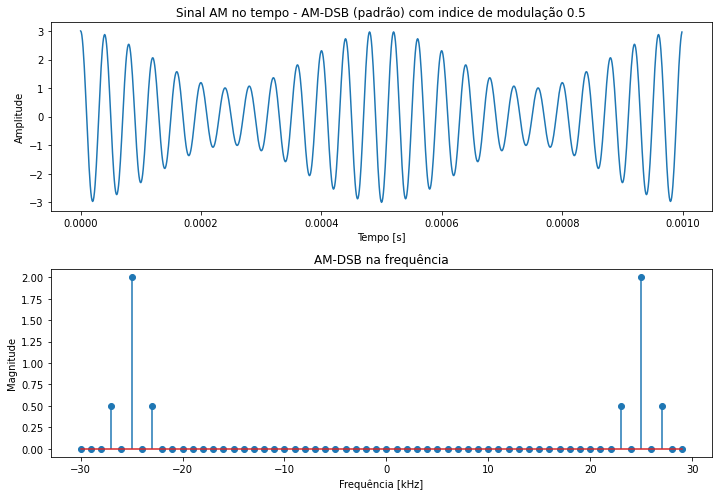

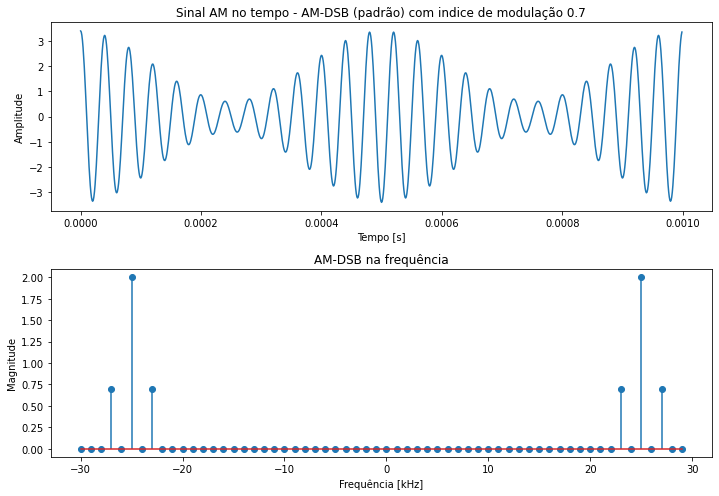

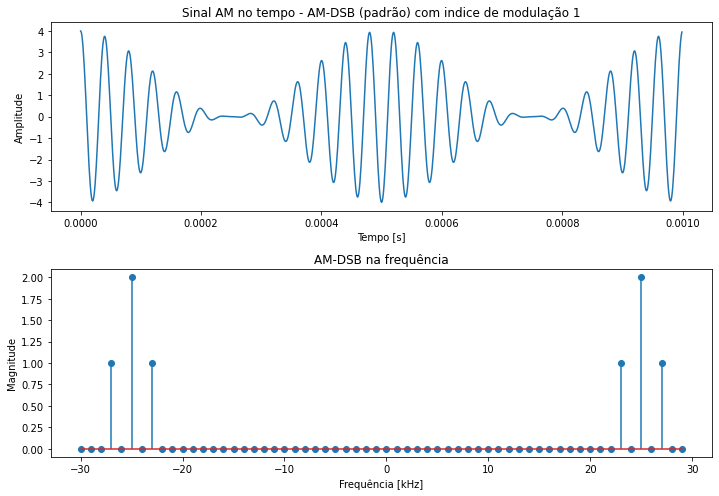

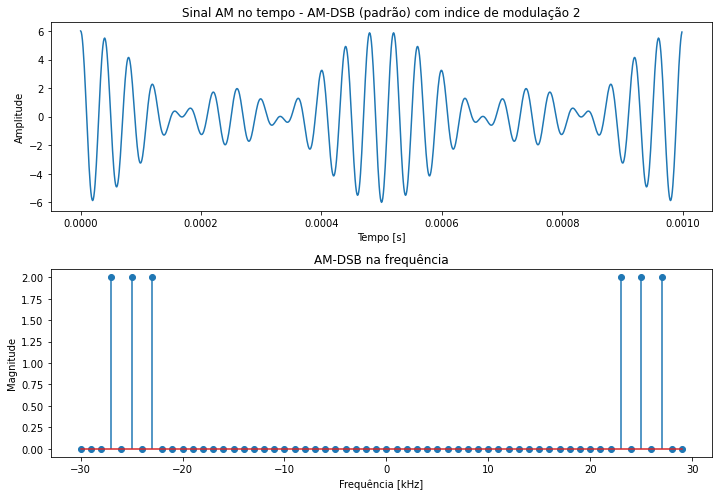

In [2]:
## Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
# Parâmetros do sinal
CARRIER_AMPLITUDE = 2                                                         # AMPLITUDE DA PORTADORA
MODULATION_INDEXES = [0, 0.5, 0.7 , 1, 2]                                                       # ÍNDICE DE MODULAÇÃO
CARRIER_FREQUENCY = 25000                                                     # FREQUÊNCIA DA PORTADORA HZ
PASSBAND_SIGNAL_FREQUENCY = 2000
SIGNAL_SIZE = 1000
SAMPLING_TIME = 1E-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
time_axis = np.arange(SIGNAL_SIZE)*SAMPLING_TIME
for modulation_index in MODULATION_INDEXES:
    modulated_signal = CARRIER_AMPLITUDE*(1+modulation_index*np.cos(2*np.pi*PASSBAND_SIGNAL_FREQUENCY*time_axis))*np.cos(2*np.pi*CARRIER_FREQUENCY*time_axis)

    # Cálculo da FFT de AM-DSB
    FFT_SIZE = 30                                                      # Número pontos da fft
    freq_axis = np.arange(-FFT_SIZE,FFT_SIZE)                                      # Vetor de frequências 
    fft = 2.0*np.abs((fftpack.fft(modulated_signal)))/SIGNAL_SIZE                           # Cálculo da FFT
    modulated_signal_size = len(modulated_signal)                                                    # Comprimento do sinal modulado
    freq_domain_signal_size = len(freq_axis)                                                    # Comprimento do sinal em frequência

    # A fft em 30 pontos (para melhor visualização)
    fft_new = np.zeros(freq_domain_signal_size)                                         # Inicialização do vetor da frequência
    sampling_freq = 1/SAMPLING_TIME                                               # Taxa de amostragem
    new_freq_axis = (sampling_freq/modulated_signal_size)*freq_axis                                        # Eixo de frequências
    for i in range(freq_domain_signal_size):
        axis = freq_axis[i]
        if axis>=0:
            fft_new[i] = fft[axis]
        else :
            fft_new[i] = fft[modulated_signal_size+axis]

    # Gráfico do AM-DSB no tempo
    plt.figure(1,[10,7])
    plt.subplot(211)
    plt.plot(time_axis, modulated_signal)
    plt.title(f"Sinal AM no tempo - AM-DSB (padrão) com indice de modulação {modulation_index}")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Amplitude")

    # Gráfico do AM-DSB na frequência
    plt.subplot(212)
    plt.title("AM-DSB na frequência")
    plt.xlabel("Frequência [kHz]")
    plt.ylabel("Magnitude")
    plt.stem(new_freq_axis/1e3,fft_new)
    plt.tight_layout()
    plt.show()

In [3]:
#calcula potencias com diversos métodos para cada indice de modulação diferente
for modulation_index in MODULATION_INDEXES:
    modulated_signal = CARRIER_AMPLITUDE*(1+modulation_index*np.cos(2*np.pi*PASSBAND_SIGNAL_FREQUENCY*time_axis))*np.cos(2*np.pi*CARRIER_FREQUENCY*time_axis)

    # Cálculo da FFT de AM-DSB
    FFT_SIZE = 30                                                      # Número pontos da fft
    freq_axis = np.arange(-FFT_SIZE,FFT_SIZE)                                      # Vetor de frequências 
    fft = 2.0*np.abs((fftpack.fft(modulated_signal)))/SIGNAL_SIZE                           # Cálculo da FFT
    modulated_signal_size = len(modulated_signal)                                                    # Comprimento do sinal modulado
    freq_domain_signal_size = len(freq_axis)                                                    # Comprimento do sinal em frequência

    # A fft em 30 pontos (para melhor visualização)
    fft_new = np.zeros(freq_domain_signal_size)                                         # Inicialização do vetor da frequência
    sampling_freq = 1/SAMPLING_TIME                                               # Taxa de amostragem
    new_freq_axis = (sampling_freq/modulated_signal_size)*freq_axis                                        # Eixo de frequências
    for i in range(freq_domain_signal_size):
        axis = freq_axis[i]
        if axis>=0:
            fft_new[i] = fft[axis]
        else :
            fft_new[i] = fft[modulated_signal_size+axis]
    #Potencia teórica
    carrier_power = CARRIER_AMPLITUDE**2 / 2
    theoric_power = carrier_power * (1 + (modulation_index**2 / 2) )
    #Potência com as amostras do sinal do tempo
    Px_tempo =(np.linalg.norm(modulated_signal)**2)/modulated_signal_size  
    #Potência com as amostras da FFT do sinal
    Px_fft = np.sum(fft*np.conj(fft))
    Px_fft = abs(Px_fft)
    #Potência via correlação
    Rxx=np.correlate(modulated_signal,modulated_signal,'full')/ modulated_signal_size 
    Px_Rxx = Rxx[modulated_signal_size - 1]    
    #Calculando a potência via variância
    Pvar = np.var(modulated_signal)

    print(f"-------------Com indice de modulação {modulation_index} --------------")
    print(f"potencia calculada usando expressão teórica: {theoric_power} --------------")
    print(f"Potencia calculada com o sinal no tempo: {Px_tempo}")
    print(f"Potencia calculada usando a autocorrelação: {Px_Rxx}")
    print(f"Potencia calculada usando a variância: {Pvar}")
    print()

-------------Com indice de modulação 0 --------------
potencia calculada usando expressão teórica: 2.0 --------------
Potencia calculada com o sinal no tempo: 1.9999999999999996
Potencia calculada usando a autocorrelação: 1.9999999999999998
Potencia calculada usando a variância: 1.9999999999999998

-------------Com indice de modulação 0.5 --------------
potencia calculada usando expressão teórica: 2.25 --------------
Potencia calculada com o sinal no tempo: 2.2499999999999982
Potencia calculada usando a autocorrelação: 2.2499999999999987
Potencia calculada usando a variância: 2.249999999999999

-------------Com indice de modulação 0.7 --------------
potencia calculada usando expressão teórica: 2.4899999999999998 --------------
Potencia calculada com o sinal no tempo: 2.4899999999999984
Potencia calculada usando a autocorrelação: 2.489999999999999
Potencia calculada usando a variância: 2.489999999999999

-------------Com indice de modulação 1 --------------
potencia calculada usando exp

In [4]:
taus = [10e-4, 2e-4, 4e-3]                                                      # Constante de tempo do detector de envelope
Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for tau in taus:
    for i in range(Ns):
        inp = x_AM[i]
        if inp>=out:
            out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
        else:
            out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
        x_env[i] = out
    mse = np.square(np.subtract(x_envIdeal,x_env)).mean()
    print(f"O erro quadrático médio para o tau {tau} foi de {mse}")




O erro quadrático médio para o tau 0.001 foi de 0.20157016927321242
O erro quadrático médio para o tau 0.0002 foi de 0.053694648717358975
O erro quadrático médio para o tau 0.004 foi de 0.4101990651124003


<function matplotlib.pyplot.show(close=None, block=None)>

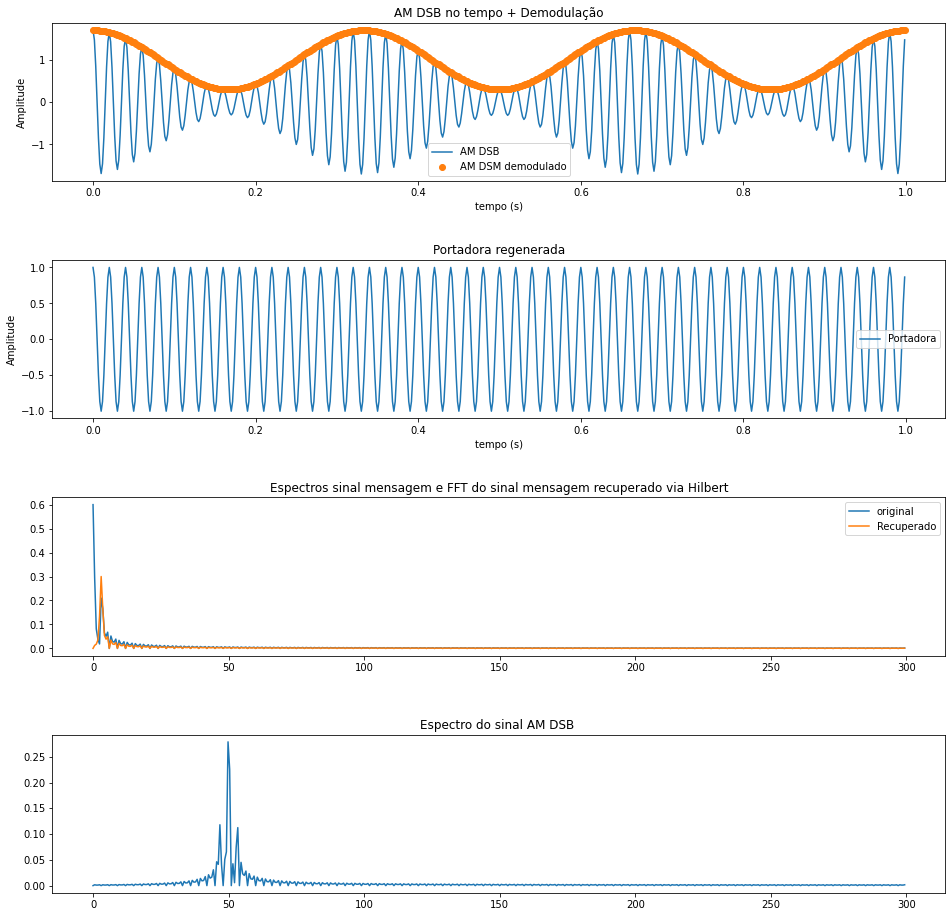

In [20]:
from scipy.signal import hilbert
#parâmetros do sinal modulante
sampling_freq = 600
sampling_rate = 1/sampling_freq
message_freq  = 3
carrier_frequ = 50
modulation_index = 0.7
#Gerando sinais no tempo
time_array = np.arange(0,1, sampling_rate)
message_signal = np.cos(2*np.pi*message_freq*time_array)
#AM-DSB modulate signal
am_dsb_signal = (1.0+modulation_index*message_signal)*np.cos(2*np.pi*carrier_frequ*time_array);  # Onda Modulada AM-DSB
analitc_signal = hilbert(am_dsb_signal)
am_demodulated = np.absolute(analitc_signal) #envelope instantaeno
inst_phase = np.unwrap(np.angle(analitc_signal)) 
regenerated_carrier = np.cos(inst_phase)
#Gerando sinais na frequencia
fft_lenght = 1000
freq_axis = np.arange(0,sampling_freq/2, sampling_freq/fft_lenght)

am_dsb_fft = np.fft.fft(am_dsb_signal ,fft_lenght) / fft_lenght
am_dsb_fft_uni = am_dsb_fft[0:fft_lenght//2]

am_demodulated_fft = np.fft.fft(am_demodulated,fft_lenght) / fft_lenght
am_demodulated_fft_uni = am_demodulated_fft[0:fft_lenght//2]

message_signal_fft = np.fft.fft(message_signal, fft_lenght) / fft_lenght
message_signal_fft_uni = message_signal_fft[0:fft_lenght//2]

fig, axs = plt.subplots(4,1,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
axs[0].plot(time_array,am_dsb_signal,'-')
axs[0].plot(time_array,am_demodulated,'o')
axs[0].set_title("AM DSB no tempo + Demodulação")
axs[0].set_xlabel("tempo (s)")
axs[0].set_ylabel("Amplitude")
axs[0].legend(["AM DSB","AM DSM demodulado"])

axs[1].plot(time_array,regenerated_carrier)
axs[1].set_title("Portadora regenerada")
axs[1].set_xlabel("tempo (s)")
axs[1].set_ylabel("Amplitude")
axs[1].legend(["Portadora"])

axs[2].plot(freq_axis,np.abs(am_demodulated_fft_uni),freq_axis, np.abs(message_signal_fft_uni))
axs[2].set_title("Espectros sinal mensagem e FFT do sinal mensagem recuperado via Hilbert")
axs[2].legend(["original","Recuperado"])

axs[3].plot(freq_axis,np.abs(am_dsb_fft_uni))
axs[3].set_title("Espectro do sinal AM DSB ")
plt.show


